## Data Loading

In [1]:
# Import the required Modules
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import joblib 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
import seaborn as sns 

data = pd.read_csv('drive/MyDrive/ML/urls.csv')
data.head()

,url,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1.0
3,mail.printakid.com/www.online.americanexpress....,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,1.0


## Data Preprocessing and EDA

In [3]:
data.describe()

,label
count,95913.000000
mean,0.499453
std,0.500002
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [4]:
data.shape

(96005, 2)

In [5]:
#knowing information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96005 entries, 0 to 96004
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   url     96005 non-null  object 
 1   label   95913 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.5+ MB


In [6]:
#for removing rows which in the dataset contains null values
data = data.dropna(axis = 0)
data.head()

,url,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1.0
3,mail.printakid.com/www.online.americanexpress....,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,1.0


In [7]:
#shuffling the rows in the dataset
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,url,label
0,www.paypal.co.uk.6119.secure2z.mx/images/cgi.b...,1.0
1,dukung-indonesia.tk/,1.0
2,'us.battle.net.zzwow.asia/login/en/?ref=http\%...,1.0
3,accurint.markstajan.com/,1.0
4,en.jjok.asia/login/en/index.htm,1.0


## Feature Extraction

In [2]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length = 0            
  else:
    length = 1            
  return length

# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
      return 0

# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0

#!pip install python-whois

# importing required packages for this section
import re
from bs4 import BeautifulSoup
#import whois
import urllib
import urllib.request
from datetime import datetime

# 11.DNS Record availability (DNS_Record)
# obtained in the featureExtraction function itself

# 12.Web traffic (Web_Traffic)
def web_traffic(url):
  try:
    #Filling the whitespaces in the URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  except:
    return 0
  if rank <100000:
    return 1
  else:
    return 0

# 13.Survival time of domain: The difference between termination time and creation time (Domain_Age)  
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

# 14.End time of domain: The difference between termination time and current time (Domain_End) 
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

# importing required packages for this section
import requests

# 15. IFrame Redirection (iFrame)
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

# 16.Checks the effect of mouse over on status bar (Mouse_Over)
def mouseOver(response): 
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

# 17.Checks the status of the right click attribute (Right_Click)
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

# 18.Checks the number of forwardings (Web_Forwards)    
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

#Function to extract features
def featureExtraction(url):

  features = []
  #Address bar based features (10)
  #features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))
  
  #Domain based features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))
  
  # HTML & Javascript based features
  try:
    response = requests.get(url)
  except:
    response = ""

  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  
  return features

#converting the list to dataframe
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards', 'Label']

In [9]:
#selecting 10000 instaces in the dataset randomly for training and testing
data = data.sample(n = 20000, random_state = 12).copy()
data = data.reset_index(drop=True)
data.head()

,url,label
0,tools.ietf.org/html/rfc1025,0.0
1,ftipe.com.br/dispatch.5885d80ta13c0d3b1f8e2636...,1.0
2,www.gameindustry.com/review/item.asp?id=191,0.0
3,www.angelfire.com/pr/czechrepublic/,0.0
4,dniash.solidwebhost.com/louis-daraft-dollars-m...,1.0


In [ ]:
urlsFeatures = []
for i in range(0, 20000):
  url = data['url'][i]
  label = data['label'][i]
  fe = featureExtraction(url)
  fe.insert(0, url)
  fe.append(label)
  urlsFeatures.append(fe)

In [ ]:
featuredDataset = pd.DataFrame(urlsFeatures, columns = feature_names)

In [ ]:
featuredDataset

In [3]:
dataset = pd.read_csv('drive/MyDrive/ML/urldataset.csv')
dataset.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


## 4. Visualizing the data

In [ ]:
#Plotting the data distribution
dataset.hist(bins = 50,figsize = (15,15))
plt.show()

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(dataset.corr())
plt.show()

## Model Training

### Splitting Data

In [14]:
x = dataset.drop(['Domain', 'Label'], axis = 1)
x = x.values
y = dataset['Label']
x.shape

(10000, 16)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state = 12)
x_train.shape, x_test.shape

((8000, 16), (2000, 16))

### Machine Learning Model Training and Testing

In [16]:
models = []
Train_accuracy = []
Test_accuracy = []

def save_results(m, tr, te):
  models.append(m)
  Train_accuracy.append(tr)
  Test_accuracy.append(te)


In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_train_pred = rfc.predict(x_train)
rfc_test_pred = rfc.predict(x_test)
rfc_train_accuracy = accuracy_score(rfc_train_pred, y_train)
rfc_test_accuracy = accuracy_score(rfc_test_pred, y_test)

save_results('RandomForestClassifier', rfc_train_accuracy, rfc_test_accuracy)


In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_train_pred = dtc.predict(x_train)
dtc_test_pred = dtc.predict(x_test)
dtc_train_accuracy = accuracy_score(dtc_train_pred, y_train)
dtc_test_accuracy = accuracy_score(dtc_test_pred, y_test)

save_results('DecisionTreeClassifier', dtc_train_accuracy, dtc_test_accuracy)


In [19]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
svc_train_pred = svc.predict(x_train)
svc_test_pred = svc.predict(x_test)
svc_train_accuracy = accuracy_score(svc_train_pred, y_train)
svc_test_accuracy = accuracy_score(svc_test_pred, y_test)

save_results('SupportVectorMachine', svc_train_accuracy, svc_test_accuracy)


In [20]:
results = pd.DataFrame({ 'Model': models,    
    'Train Accuracy': Train_accuracy,
    'Test Accuracy': Test_accuracy})
results

,Model,Train Accuracy,Test Accuracy
0,RandomForestClassifier,0.866125,0.8695
1,DecisionTreeClassifier,0.866125,0.8680
2,SupportVectorMachine,0.819000,0.8170


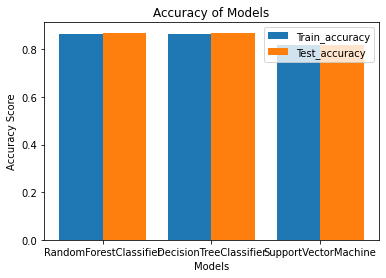

In [21]:

X_axis = np.arange(len(models))
  
plt.bar(X_axis - 0.2, Train_accuracy, 0.4, label = 'Train_accuracy')
plt.bar(X_axis + 0.2, Test_accuracy, 0.4, label = 'Test_accuracy')

plt.xticks(X_axis, models)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy of Models")
plt.legend()
plt.show()

In [22]:
def predictPhish(url):
  features = featureExtraction(url)
  result = rfc.predict([features])
  if result == 1:
    return 'Legitimate'
  else:
    return 'Phishing'

In [23]:
predictPhish('google.com')

'Legitimate'